<a href="https://colab.research.google.com/github/cyprianoeduardo/MAB760_Computational_Linear_Algebra/blob/master/2019_06_04_Apresenta%C3%A7%C3%A3o_%C3%81lgebra_Linear_Computacional_Jo%C3%A3o_Paix%C3%A3o_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de Dimensionalidade e Recomendação de Filmes.

    Autor: Eduardo de Souza Cypriano.

    Apresentação sobre os temas de Redução de Dimensionalidade e Recomendação de Filmes, conforme solicitação e conhecimentos adquiridos através da disciplina de Álgebra Linear Computacional, no PPGI-UFRJ.
    
    

---



# Boa tarde!





    Este sou eu tentando escolher os temas e admirando as possibilidades de aplicação da Álgebra Linear Computacional:
![alt text](https://cdn-images-1.medium.com/max/800/0*tAWteW6Af3Ay5IGk.gif)

# O que eu devo assistir hoje à noite?



    Com que frequência você se pergunta, assim que chega em casa, depois de um dia cansativo de trabalho ou estudo, sobre qual filme vai assistir? Quanto a mim, particularmente, isto é recorrente. O que antigamente era uma tarefa relativamente simples, limitada ao acervo disponível numa estante de uma locadora, tornou-se complexa, visto à multiplicidade de opções disponíveis, muito devido à Internet e consequentes serviços de streaming.

![alt text](https://cdn-images-1.medium.com/max/800/1*jR7ACuo0RmXwpHjcDAEqqg.gif)

    No decorrer da década de 90, os Sistemas de Recomendação emergiram, trazendo ferramentas de software e técnicas com o intuito de prover sugestões de itens de uso para um usuário. Estas sugestões estão relacionadas a diversos processos de tomada de decisão, como escolher o que comprar, que música escutar, que notícias ler e que filme assistir ao final do dia(1). 


# E como isso funciona?


*   Como essas recomendações funcionam?

*   Quais dados eu preciso para auxiliar estas recomendações?

*   Existe um modelo preciso ou eficiente para este problema?

*   Existe Álgebra Linear aqui?

![alt text](https://cdn-images-1.medium.com/max/800/1*dT8rK8tgegG8nr1r2bz6bQ.gif)





# Um milhão de dólares!


    Caso você soubesse todas essas respostas a exatos dez anos atrás, você teria esta quantia em mãos. Uma empresa de serviços de filmes via streaming ofereceu, em 2006, um prêmio para qualquer um que pudesse encontrar um sistema de recomendação de filmes mais preciso que seu sistema atual, em pelo menos 10%. Três anos depois, uma equipe foi premiada(2).
    
    A ordem de grandeza demonstra a relevâncias destes sistemas, não apenas para os usuários, como também para os modelos de négócios de empresas.

# Caminhos básicos

    Tradicionalmente, existem 2 métodos para construção de sistemas de recomendação:


*   Recomendação baseada em conteúdo

*   Filtragem colaborativa



# Filtragem Colaborativa

    Divide-se em duas categorias:
    

*   Baseado no usuário

*   Baseado no item



# A solução

    Nosso problema de recomendação, relativo à filtragem colaborativa, é na verdade, um problema de otimização!

    Estamos tentando buscar um modelo que satifaça a relação entre Usuários e seus Filmes, e nos faça prever quão bom nós somos em predizer a nota de um filme, dado um usuário.

## Fatorização de matriz

Podemos modelar a relação entre filmes e usuários através de uma matriz, chamada de matriz de utilidade. Ela consiste em linhas que representam os filmes e colunas que representam os usuários. Os itens da matriz são as avaliações dos usuários.

Como temos muitas informações, necessitamos verificar quais são as mais relevantes, diminuindo o custo de processamento.

## Similaridade do Cosseno


![alt text](https://cdn-images-1.medium.com/max/800/1*ibUmdYojp4japImXM-6qcA.png)

    A similaridade do cosseno é uma medida de similaridade que mede o cosseno entre dois vetores. Cossenos próximos à 1 indicam ângulos pequenos, ou seja, indicando grande similaridade. Em contrapartida, cossenos próximos  à -1 indicam ângulos grandes, com vetores em direções distintas, indicando similaridade distinto. Cossenos iguais a 0 indicam vetores ortogonais, indicando dissimilaridade.


![alt text](https://cdn-images-1.medium.com/max/800/1*MgE-cLwdRUk-D2ErtfX4mA.png)

## Um ponto alto da álgebra linear

    Utilizaremos a Decomposição em Valores Singulares (Single Value Decomposition, ou SVD, em inglês). A mesma é descrita pelo devido às suas características distintas, fatorando uma matriz em 3 componentes, que capturam a similaridade entre Filmes e usuários.

![alt text](https://cdn-images-1.medium.com/max/1200/1*haUDjEiQmG0RapR0SHos6Q.png)

    O SVD apresenta os vetores originais da matriz de utilidade em uma nova base, onde descrece algumas informações latentes.

![alt text](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

![alt text](https://cdn-images-1.medium.com/max/800/1*gZtUL3pzZaiSDWMPnv3H2g.gif)

![(alt text)](https://www.researchgate.net/profile/Konstantinos_Bougiatiotis/publication/321025221/figure/fig9/AS:668660309962763@1536432449448/Singular-value-decomposition-followed-by-rank-lowering-for-latent-semantic-indexing.jpg)

*Figure 6* - Decomposição em valores singulares(SVD) acompanhada de redução de dimensionalidade(3).

# Recomendador de filmes usando SVD
(4)

    Dado um título de um filme, utilizaremos o método SVD(Single Value Decomposition) aprendido na disciplina, para recomendar filmes baseados nas classificações de usuários. Utilizaremos a base de dados MovieLens 1M, que consiste em aproximadamente 1 milhão de classificações de 4000 filmes, realizados por 6000 usuários(5).

In [0]:
#@title Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#@title Importando as bases de dados `ratings.dat` e `movies.dat`, do [Dataset MovieLens 1M](https://grouplens.org/datasets/movielens/1m/)

data = pd.io.parsers.read_csv('/content/ratings.dat', 
    names=['user_id', 'movie_id', 'rating', 'time'],
    engine='python', delimiter='::')
movie_data = pd.io.parsers.read_csv('/content/movies.dat',
    names=['movie_id', 'title', 'genre'],
    engine='python', delimiter='::')

In [0]:
#@title Analisando a tabela `data`

data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [0]:
#@title Analisando a tabela `movie_data`

movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#@title Criando a matriz de classificações (f × u), sendo linhas como filmes e colunas como usuários

ratings_mat = np.ndarray(
    shape=(np.max(data.movie_id.values), np.max(data.user_id.values)),
    dtype=np.uint8)
ratings_mat[data.movie_id.values-1, data.user_id.values-1] = data.rating.values

In [0]:
#@title Normalizando a matriz, subtraindo a média da mesma

normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

In [0]:
#@title Calculando o SVD

A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)

In [0]:
#@title Calculando a similaridade de cosseno, classificando os mais similares e retornando o maior

def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Helper function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recomendações para {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print(movie_data[movie_data.movie_id == id].title.values[0])

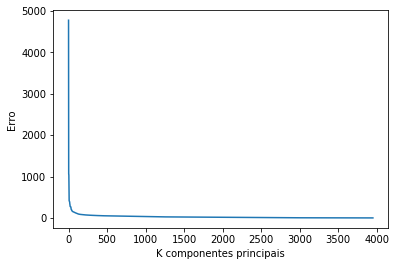

In [0]:
#@title Analisando a quantidade de componentes principais (`k`) adequados

df=pd.DataFrame({'xvalues': list(range(len(S))), 'yvalues': S })
 
plt.plot( 'xvalues', 'yvalues', data=df)
#plt.axis([0, len(S), 0, 6])
plt.xlabel("K componentes principais")
plt.ylabel("Erro")
plt.show()

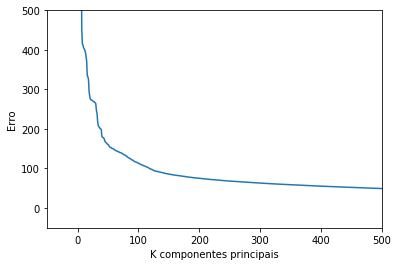

In [0]:
#@title Visualizando a região mais próxima à inflexão

df=pd.DataFrame({'xvalues': list(range(len(S))), 'yvalues': S })
 
plt.plot( 'xvalues', 'yvalues', data=df)
plt.axis([-50, 500, -50, 500])
plt.xlabel("K componentes principais")
plt.ylabel("Erro")
plt.show()

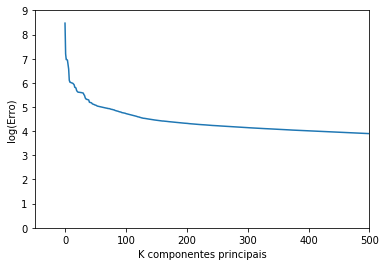

In [0]:
#@title Visualizando o erro através de uma função logarítmica
df=pd.DataFrame({'xvalues': list(range(len(S))), 'yvalues': np.log(S) })
 
plt.plot( 'xvalues', 'yvalues', data=df)
plt.axis([-50, 500, 0, 9])
plt.xlabel("K componentes principais")
plt.ylabel("log(Erro)")
plt.show()

Recomendações para Toy Story (1995): 

Toy Story (1995)
Aladdin (1992)
Monty Python and the Holy Grail (1974)
Toy Story 2 (1999)
Beauty and the Beast (1991)
Babe (1995)
Groundhog Day (1993)
Sword in the Stone, The (1963)
Lion King, The (1994)
Bug's Life, A (1998)




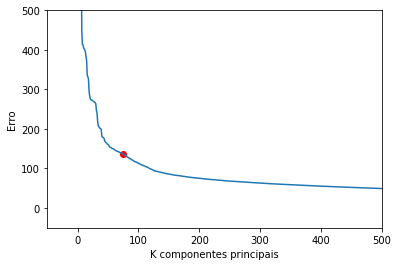


 Matriz de coordenadas na base original:  (3952, 6040) 
 Matriz de coordenadas na nova base:  (3952, 74) 
 Taxa de compactação:  98.77  %


In [0]:
#@title Definindo os `k` componentes principais para representar os filmes, um `movie_id` para encontrar recomendações e imprimir os `top_n` primeiros resultados

movies_dict = dict(zip(movie_data["title"].values, movie_data["movie_id"].values))
k = 74 #@param {type: "slider", min: 1, max: 500}
movie_title = "Toy Story (1995)"  #@param ['Toy Story (1995)', 'GoldenEye (1995)', 'Top Gun (1986)', 'Dirty Dancing (1987)', 'Platoon (1986)', 'Chariots of Fire (1981)']
movie_id = movies_dict[movie_title]
top_n = 10 #@param {type: "slider", min: 1, max: 50}

sliced = V.T[:, :k]#np.dot(U[:, :k], np.diag(S[:k])) # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)
print_similar_movies(movie_data, movie_id, indexes)

print("\n")

df=pd.DataFrame({'xvalues': list(range(len(S))), 'yvalues': S })
plt.plot( 'xvalues', 'yvalues', data=df)
plt.scatter(k, S[k], color='red')
plt.axis([-50, 500, -50, 500])
plt.xlabel("K componentes principais")
plt.ylabel("Erro")
plt.show()

print("\n", "Matriz de coordenadas na base original: ", ratings_mat.shape,
      "\n", "Matriz de coordenadas na nova base: ", sliced.shape,
      "\n", "Taxa de compactação: ",
      round(100 - (sliced.shape[1]*100/ratings_mat.shape[1]), 2), " %")

## FUNCIONA!!!

![alt text](https://cdn-images-1.medium.com/max/800/0*60_AN0r_HyLfuv-0.gif)

# Conclusão

    O objetivo foi demonstrar como funcionam os sistemas de recomendação, e como a aplicação da Álgebra Linear, mais especificamente do SVD, é poderosa e extensiva. Conceitualmente, o SVD adequa-se ao problema pois sua fatoração exprime exatamente o que procuramos, a relação entre itens e seus principais fatores, atendendo ainda o problema de escalabilidade e esparcidade  da filtragem colaborativa. Sua relevância é tão distinta, que boa parte dos candidatos, do prêmio de otimização oferecido pela empresa de streaming, utilizaram o SVD como base para seu algoritmo(2).
    
![alt text](https://cdn-images-1.medium.com/max/800/0*UCL8ajlT8-DSZU7o.gif)
    
    Porém, ele também não é infalível. Há dificuldade em justificar as recomendações ao usuário (utilizamos uma abstração vetorial para tal), e quando vetores são exatamente opostos, os mesmos se anulam, trazendo distorções na análise e  representação. Para este último problema, existem abordagens alternativas, que serão discutidas em trabalhos posteriores.

# Referências

1.   RICCI, Francesco e ROKACH, Lior e SHAPIRA, Bracha. Introduction to Recommender Systems Handbook. [S.d.]. Disponível em: <http://www.inf.unibz.it/~ricci/papers/intro-rec-sys-handbook.pdf>. Acesso em: 6 jun 2019.
2.   GOWER, Stephen. Netflix Prize and SVD. . [S.l: s.n.], 2014. Disponível em: <http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-gower-netflix-SVD.pdf>. Acesso em: 6 jun 2019.
3.   BOUGIATIOTIS, Konstantinos e GIANNAKOPOULOS, Theodore. Enhanced Movie Content Similarity Based on Textual, Auditory and Visual Information. 9 Nov 2017. Disponível em: <http://arxiv.org/abs/1711.03889>. Acesso em: 6 jun 2019.
1.   GROUPLENS. MovieLens 1M Dataset | GroupLens. Disponível em: <https://grouplens.org/datasets/movielens/1m/>. Acesso em: 3 jun 2019. 
2.   QUEK, Alyssa. Simple Movie Recommender Using SVD | Alyssa. Disponível em: https://alyssaq.github.io/2015/20150426-simple-movie-recommender-using-svd/. Acesso em: 8 maio 2019.
4.   KLEIN, Philip N. Coding the Matrix: Linear Algebra through Computer Science Applications. [S.l.]: Newtonian Press, 2013. 
5.   SHLENS, Jonathon. A Tutorial on Principal Component Analysis. 3 Abr 2014. Disponível em: <http://arxiv.org/abs/1404.1100>. Acesso em: 3 jun 2019.

# Obrigado!

![alt text](https://4.bp.blogspot.com/-fRLYrN8Ihbs/Tnod3NQLltI/AAAAAAAAANM/Jo8zY5YwNAE/s1600/xkcd435.png)